In [10]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [11]:
import numpy as np
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [35]:
df_raw = pd.read_csv("data_full.csv", sep=',').drop("Unnamed: 0", axis=1)

In [36]:
df_raw.head(200)

,name,person_status,url,start_date,answer_time,first_sold_time,n_active,n_finished,active_finished_ratio,min_active_cost,max_active_cost,mean_active_cost,min_finished_cost,max_finished_cost,mean_finished_cost
0,по объявлению,частное лицо,https://www.avito.ru/user/7bce9fbf0f318f4efb93...,734808.0,Отвечает за несколько часов,734818.0,19,103,0.192308,500.0,8000.0,1957.894737,300.0,1125000.0,28545.145631
1,елизавета,компания,https://www.avito.ru/user/5cfdf8dfb0217a872af8...,734808.0,Отвечает за несколько часов,735417.0,68,207,0.331731,0.0,6000.0,566.176471,0.0,250000.0,2792.173913
2,оксана,частное лицо,https://www.avito.ru/user/5dfe59f692e07a6115b6...,736573.0,NaN,736576.0,7,4,1.600000,200.0,800.0,557.142857,400.0,800.0,600.000000
3,наталья,частное лицо,https://www.avito.ru/user/07e1bbe73f2ab757de5e...,736389.0,Отвечает за несколько часов,737015.0,8,1,4.500000,100.0,1800.0,643.750000,450.0,450.0,450.000000
4,виктория,частное лицо,https://www.avito.ru/user/c19a788afa4e6ffb5bc5...,736450.0,NaN,736557.0,4,8,0.555556,250.0,5000.0,1862.500000,150.0,6000.0,981.250000
5,виктория лоскутова,частное лицо,https://www.avito.ru/user/2ce7e1dd51b89b615f0b...,736603.0,Отвечает в течение дня,736658.0,15,5,2.666667,250.0,3500.0,1496.666667,500.0,1800.0,1060.000000
6,марина с,частное лицо,https://www.avito.ru/user/773fefe65c6d7ac7a792...,736695.0,NaN,NaN,4,0,5.000000,270.0,2800.0,1587.500000,NaN,NaN,NaN
7,частное лицо,частное лицо,https://www.avito.ru/user/0189c3bc54f48b89dd99...,734228.0,Отвечает в течение дня,735017.0,24,17,1.388889,12.0,1200.0,188.833333,20.0,9500.0,1159.705882
8,-,частное лицо,https://www.avito.ru/user/937e5574803ce4aa5130...,734563.0,NaN,736995.0,34,1,17.500000,200.0,3000.0,770.588235,1000.0,1000.0,1000.000000
9,геннадий,частное лицо,https://www.avito.ru/user/b030acb838e4b9e74869...,735568.0,NaN,735583.0,2,1,1.500000,1000.0,1000.0,1000.000000,10000.0,10000.0,10000.000000


In [ ]:
df = df_raw.copy()

In [37]:
list(df_raw.person_status.unique())

['частное лицо', 'компания', 'магазин']

In [38]:
anstime_mapping = dict(zip(list(df.answer_time.unique()), [0,1,2,3,4,5]))

In [39]:
status_mapping = dict(zip(list(df.person_status.unique()), [0,1,2,3]))

In [43]:
df.replace({'answer_time': anstime_mapping, 'person_status': status_mapping}, inplace=True)

In [66]:
df.drop(["url", "name"], axis=1, inplace=True)

In [75]:
df_raw.columns

Index(['name', 'person_status', 'url', 'start_date', 'answer_time',
       'first_sold_time', 'n_active', 'n_finished', 'active_finished_ratio',
       'min_active_cost', 'max_active_cost', 'mean_active_cost',
       'min_finished_cost', 'max_finished_cost', 'mean_finished_cost'],
      dtype='object')

In [71]:
df.values

array([[0.00000000e+00, 7.34808000e+05, 0.00000000e+00, ...,
        3.00000000e+02, 1.12500000e+06, 2.85451456e+04],
       [1.00000000e+00, 7.34808000e+05, 0.00000000e+00, ...,
        0.00000000e+00, 2.50000000e+05, 2.79217391e+03],
       [0.00000000e+00, 7.36573000e+05, 1.00000000e+00, ...,
        4.00000000e+02, 8.00000000e+02, 6.00000000e+02],
       ...,
       [0.00000000e+00, 7.35265000e+05, 4.00000000e+00, ...,
        5.00000000e+02, 7.00000000e+04, 1.30625000e+04],
       [0.00000000e+00, 7.35081000e+05, 4.00000000e+00, ...,
        3.00000000e+02, 3.00000000e+03, 1.33333333e+03],
       [0.00000000e+00, 7.34077000e+05, 4.00000000e+00, ...,
        1.00000000e+03, 1.05000000e+04, 7.16666667e+03]])

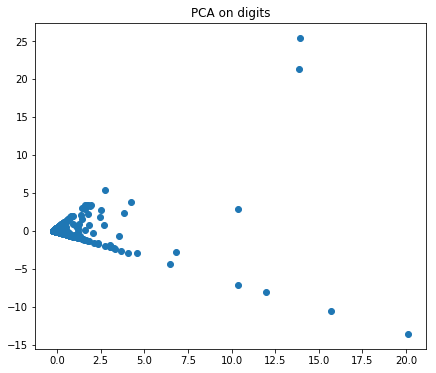

In [73]:
scaler = StandardScaler()
pca_scaler = PCA(n_components=2, random_state=140)
data_pca = scaler.fit_transform(pca_scaler.fit_transform(df.dropna().values))
plt.figure(figsize=(7, 6))
plt.title('PCA on digits')
plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.show()